In [1]:
"""
NOTEBOOK DE DEMONSTRATION DES FONCTIONNALITES DU MODULE TELENVI - PARTIE II
Thibaut Duvanel
Février 2022

Dépendances
-----------

Avant de commencer, s'assurer de disposer de toutes les librairies suivantes :
    - gdal
    - numpy
    - geopandas
    - matplotlib

Avant-propos
------------

Le fichier telenvi.py est appelé un "module". 
Cela signifie qu'il regroupe plusieurs outils et fonctions.
Nous pouvons accéder à ses fonctions depuis d'autres scripts python.

Le script dans lequel nous sommes est nommé "main.ipynb" et est situé dans le répertoire "projet_117".
Le script telenvi.py est situé dans le même répertoire, c'est pour ça qu'on peut l'importer directement en écrivant "import telenvi". 

Données utilisées :
    image sentinel 2A acquise le 18 Janvier 2019 au niveau de la frontière Niger - Nigeria.
    les bandes sont dans le dossier "data\images_brutes\S2A_20190118_NIGER"
"""
pass

In [2]:
import telenvi

"""
1 - Création d'un stack
"""
# Définition des chemins
path_bande_4 = "data/images_brutes/S2A_20190118_NIGERIA/T32PMV_20190118T095331_B04.jp2"
path_bande_3 = "data/images_brutes/S2A_20190118_NIGERIA/T32PMV_20190118T095331_B03.jp2"
path_bande_2 = "data/images_brutes/S2A_20190118_NIGERIA/T32PMV_20190118T095331_B02.jp2"
zone_etude = "data/study_area/study_area.shp"

# Ouverture des trois bandes rouge, vert et bleu
B4 = telenvi.openGeoRaster(path_bande_4, roi = zone_etude)
B3 = telenvi.openGeoRaster(path_bande_3, roi = zone_etude)
B2 = telenvi.openGeoRaster(path_bande_2, roi = zone_etude)

# Création d'un stack
RGB_stack = telenvi.stackGeoIm([B4, B3, B2])
 
# Export du résultat
RGB_stack.exportAsRaster("data/resultats/RGB_stack.tif")

"""
La liste que j'ai transmis à la fonction telenvi.stackGeoIm contient les 3 bandes dans l'ordre RGB.
Une fois importé dans Qgis, ça permet d'afficher directement l'image en vraies couleurs.
"""
pass


---------
TELENVI MODULE 2.0
---------


RGB_stack.tif OK


In [3]:
"""
2 - Ouverture d'une image multispectrale
"""

# Définition des chemins
cible = "data/resultats/RGB_stack.tif"

# Ouverture de toutes les bandes d'un stack
stack = telenvi.openGeoRaster(cible)

# Ouverture d'une seule bande du stack
B2 = telenvi.openGeoRaster(cible, indexToLoad = 1) # Ouvre la bande en position 1, donc la deuxième, donc la verte.

# Ouverture de certaines bandes d'un stack
B2_B3 = telenvi.openGeoRaster(cible, indexToLoad = [1,2])

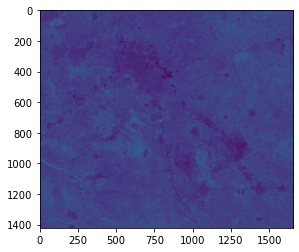

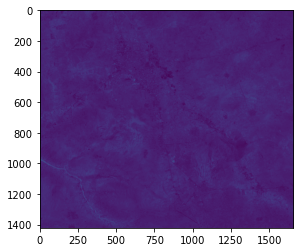

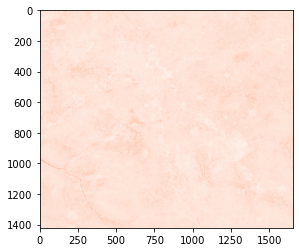

In [4]:
"""
2 suite - Observation d'un stack
"""

stack.quickVisual()  # Affiche par défaut la première bande
stack.quickVisual(2) # Affiche la 3e bande
stack.quickVisual(band = 1, colors = "Reds") # Affiche la 2e bande en nuances de rouge

In [5]:
"""
3 - Ouverture de plusieurs fichiers situés dans un même dossier
"""
dossier = "data/images_brutes/S2A_20190118_NIGERIA"
all_bands = telenvi.openManyGeoRasters(
    folder = dossier,
    pattern = "B[0-9]+.jp2$",
    roi = zone_etude
)

B01 loaded
B02 loaded
B03 loaded
B04 loaded
B05 loaded
B06 loaded
B07 loaded
B08 loaded
B09 loaded
B10 loaded
B11 loaded
B12 loaded


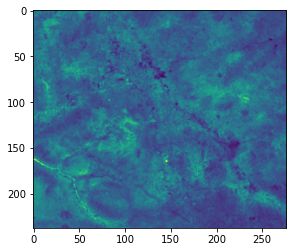

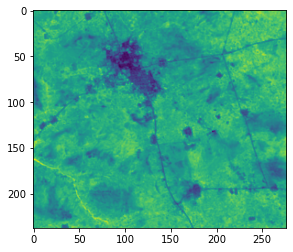

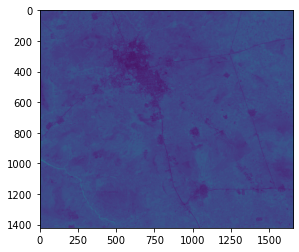

In [6]:
# On checke les bandes contenues dans all_bands
print(all_bands["B01"]) # Revient à faire all_bands["B01"].quickVisual()
print(all_bands["B09"])
print(all_bands["B08"])